<a href="https://colab.research.google.com/github/umakrishna-2002/PL-Data-Analytics/blob/main/pldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"umakrishnamarineni","key":"01cc7919f0f475105a53be670aaabe4f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hugomathien/soccer")

print("Path to dataset files:", path)

100%|██████████| 32.7M/32.7M [00:01<00:00, 17.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hugomathien/soccer/versions/10


In [ ]:

!kaggle datasets download omkargowda/football-players-stats-premier-league-20212022

Dataset URL: https://www.kaggle.com/datasets/omkargowda/football-players-stats-premier-league-20212022
License(s): CC0-1.0
  0% 0.00/24.6k [00:00<?, ?B/s]
100% 24.6k/24.6k [00:00<00:00, 75.1MB/s]


In [ ]:
!unzip /content/football-players-stats-premier-league-20212022.zip


Archive:  /content/football-players-stats-premier-league-20212022.zip
  inflating: Football Players Stats (Premier League 2021-2022).csv  


In [ ]:
import pandas as pd

df = pd.read_csv("pldata.csv",encoding='latin1')
df.head(10)

,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,...,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,...,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,...,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,...,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38
5,Granit Xhaka,Arsenal,ch SUI,"MF,DF",28.0,27,27,"2,327",25.9,1.0,...,0.12,1.2,1.2,2.3,3.5,0.05,0.09,0.14,0.05,0.14
6,Thomas Partey,Arsenal,gh GHA,MF,28.0,24,23,"2,028",22.5,2.0,...,0.13,2.5,2.5,1.3,3.8,0.11,0.06,0.17,0.11,0.17
7,Kieran Tierney,Arsenal,sct SCO,DF,24.0,22,22,"1,915",21.3,1.0,...,0.19,0.7,0.7,1.9,2.6,0.03,0.09,0.12,0.03,0.12
8,Emile Smith Rowe,Arsenal,eng ENG,"MF,FW",21.0,33,21,"1,921",21.3,10.0,...,0.56,5.8,5.8,2.2,8.0,0.27,0.10,0.37,0.27,0.37
9,Martinelli,Arsenal,br BRA,"FW,MF",20.0,29,21,"1,860",20.7,6.0,...,0.53,7.2,6.5,3.3,9.8,0.35,0.16,0.51,0.31,0.47


In [ ]:
unique_positions = df['Pos'].unique()
unique_positions

array(['FW,MF', 'DF', 'GK', 'MF', 'MF,DF', 'MF,FW', 'FW', 'DF,MF',
       'DF,FW', 'FW,DF'], dtype=object)

In [ ]:
players_by_team = df.groupby('Team')['Player'].count().reset_index()

# Rename the columns for clarity
players_by_team.columns = ['Team', 'Player']

/tmp/ipython-input-10-3685585144.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=players_by_team, x='Team', y='Player', palette='viridis')


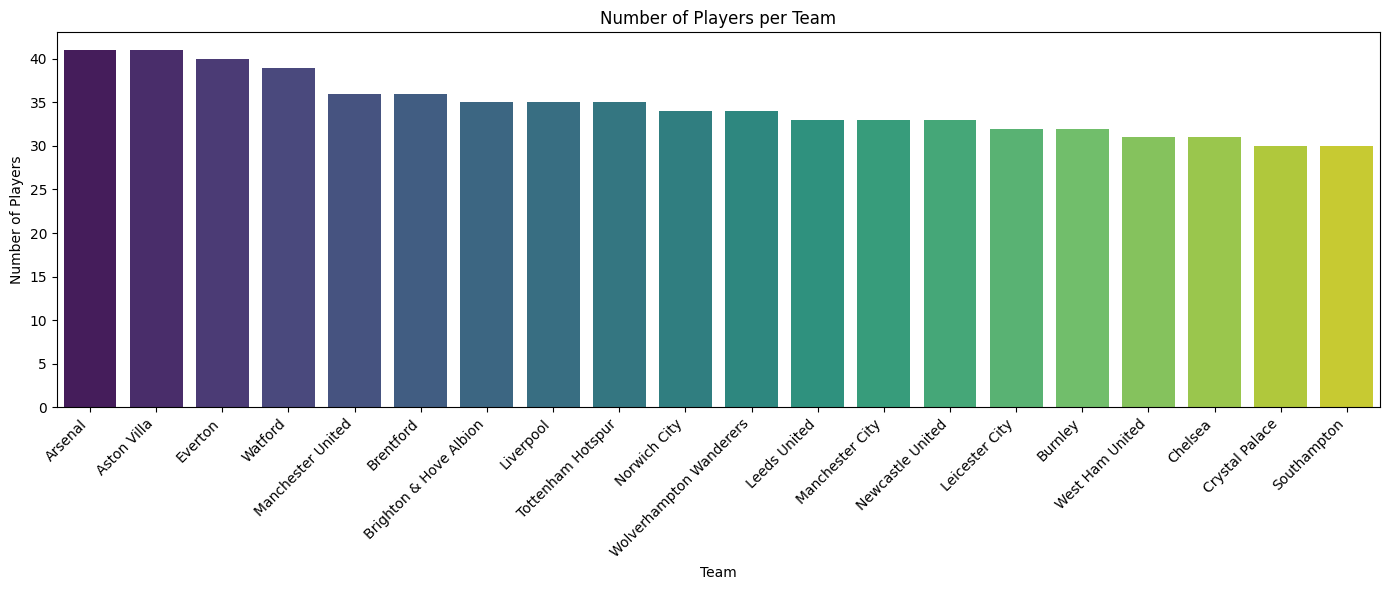

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
players_by_team = players_by_team.sort_values(by='Player', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=players_by_team, x='Team', y='Player', palette='viridis')

plt.title('Number of Players per Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
# Calculate the number of players per country
players_per_country = df.groupby('Nation')['Player'].count().reset_index()

# Rename the columns for clarity
players_per_country.columns = ['Nation', 'Player']
# Get top 15 countries
top_countries = players_per_country.sort_values(by='Player', ascending=False)

# Plot
fig = px.bar(
    top_countries,
    x='Nation',
    y='Player',
    text='Player',
    color='Player',
    color_continuous_scale='Viridis',
    title='Top 15 Countries by Number of Players'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Players',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    template='plotly_white'
)
fig.show()

In [ ]:
# Group by Team and Position, then count players
players_by_team_position = df.groupby(['Team', 'Pos'])['Player'].count().reset_index()

# Rename column for clarity
players_by_team_position.columns = ['Team', 'Position', 'NumPlayers']

# Sort (optional)
players_by_team_position = players_by_team_position.sort_values(by=['Team', 'NumPlayers'], ascending=[True, False])
pivot_table = df.pivot_table(
    index='Team', columns='Pos',values='Player',aggfunc='count',fill_value=0
)

pivot_table = pivot_table.reset_index()
print(pivot_table)



Pos                     Team  DF  DF,FW  DF,MF  FW  FW,DF  FW,MF  GK  MF  \
0                    Arsenal  16      0      1   6      0      4   4   8   
1                Aston Villa  10      1      2   6      0      3   5  10   
2                  Brentford  13      0      1   4      0      2   5  10   
3     Brighton & Hove Albion  10      2      0   6      0      2   4   6   
4                    Burnley  12      0      0   6      0      1   4   9   
5                    Chelsea  12      0      0   2      0      4   3   6   
6             Crystal Palace   9      0      1   6      0      2   3   7   
7                    Everton  12      0      0   6      0      3   4  11   
8               Leeds United   9      0      2   2      0      4   2   9   
9             Leicester City  12      0      1   4      1      2   3   6   
10                 Liverpool  13      0      0   7      0      2   4   7   
11           Manchester City  11      0      0   9      0      1   4   5   
12         M

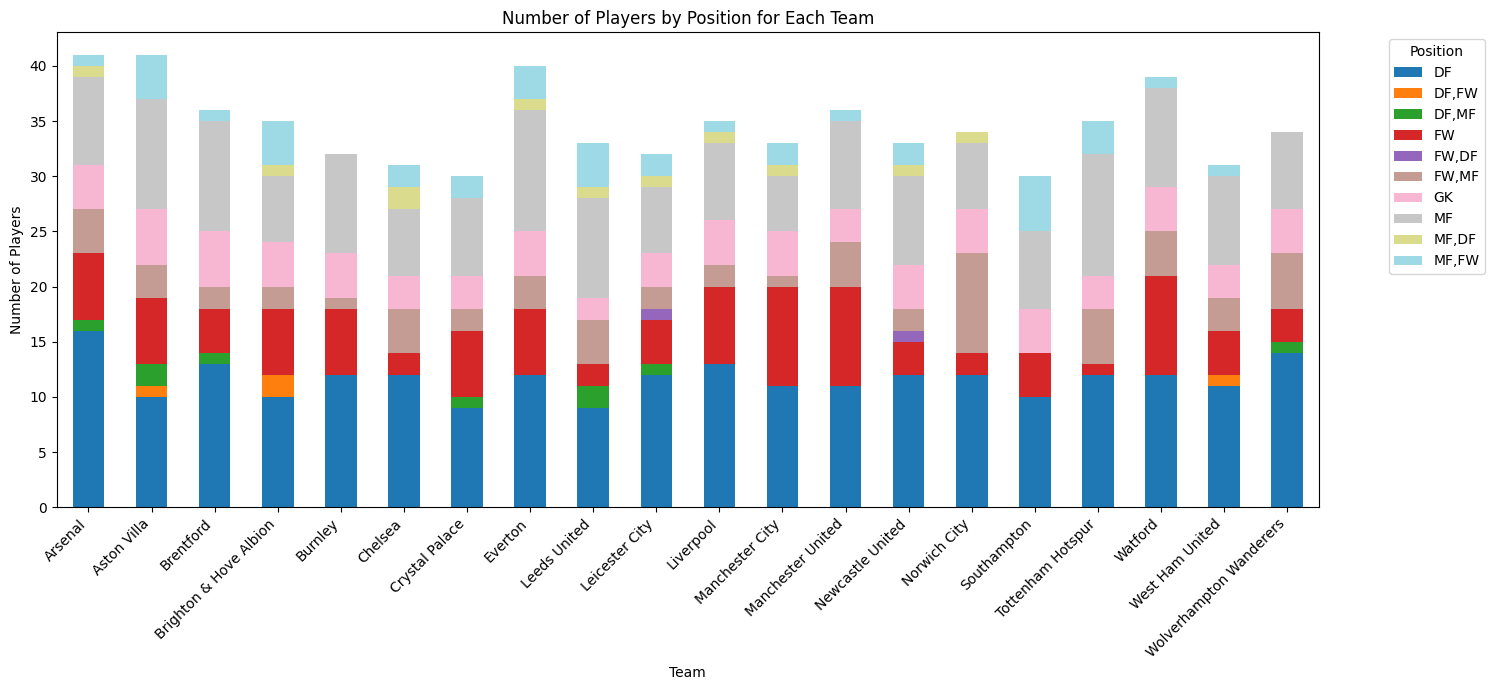

In [ ]:
import matplotlib.pyplot as plt

# Create the pivot table (if not already created)
pivot_table = df.pivot_table(
    index='Team',
    columns='Pos',
    values='Player',
    aggfunc='count',
    fill_value=0
).reset_index()

# Set the index to Team for plotting
pivot_table.set_index('Team', inplace=True)

# Plot: stacked bar chart
pivot_table.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 7),
    colormap='tab20'
)

plt.title('Number of Players by Position for Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Top Goal Scorer for each team
top_scorers_per_team = df.loc[df.groupby('Team')['Gls'].idxmax()][['Team', 'Player', 'Gls']]
top_scorers_per_team = top_scorers_per_team.rename(columns={'Player': 'Top_Scorer', 'Gls': 'Goals'})

# Top Assist Provider for each team
top_assists_per_team = df.loc[df.groupby('Team')['Ast'].idxmax()][['Team', 'Player', 'Ast']]
top_assists_per_team = top_assists_per_team.rename(columns={'Player': 'Top_Assister', 'Ast': 'Assists'})

# Merge both results
team_leaders = pd.merge(top_scorers_per_team, top_assists_per_team, on='Team')
print(team_leaders.head(15))

                      Team            Top_Scorer  Goals         Top_Assister  \
0                  Arsenal           Bukayo Saka   11.0          Bukayo Saka   
1              Aston Villa         Ollie Watkins   11.0          Emi Buendía   
2                Brentford            Ivan Toney   12.0         Bryan Mbeumo   
3   Brighton & Hove Albion      Leandro Trossard    8.0          Pascal Groß   
4                  Burnley         Maxwel Cornet    9.0       Josh Brownhill   
5                  Chelsea           Mason Mount   11.0          Mason Mount   
6           Crystal Palace         Wilfried Zaha   14.0        Michael Olise   
7                  Everton           Richarlison   10.0          Richarlison   
8             Leeds United  Raphael Dias Belloli   11.0         Daniel James   
9           Leicester City           Jamie Vardy   15.0        Harvey Barnes   
10               Liverpool         Mohamed Salah   23.0        Mohamed Salah   
11         Manchester City       Kevin D

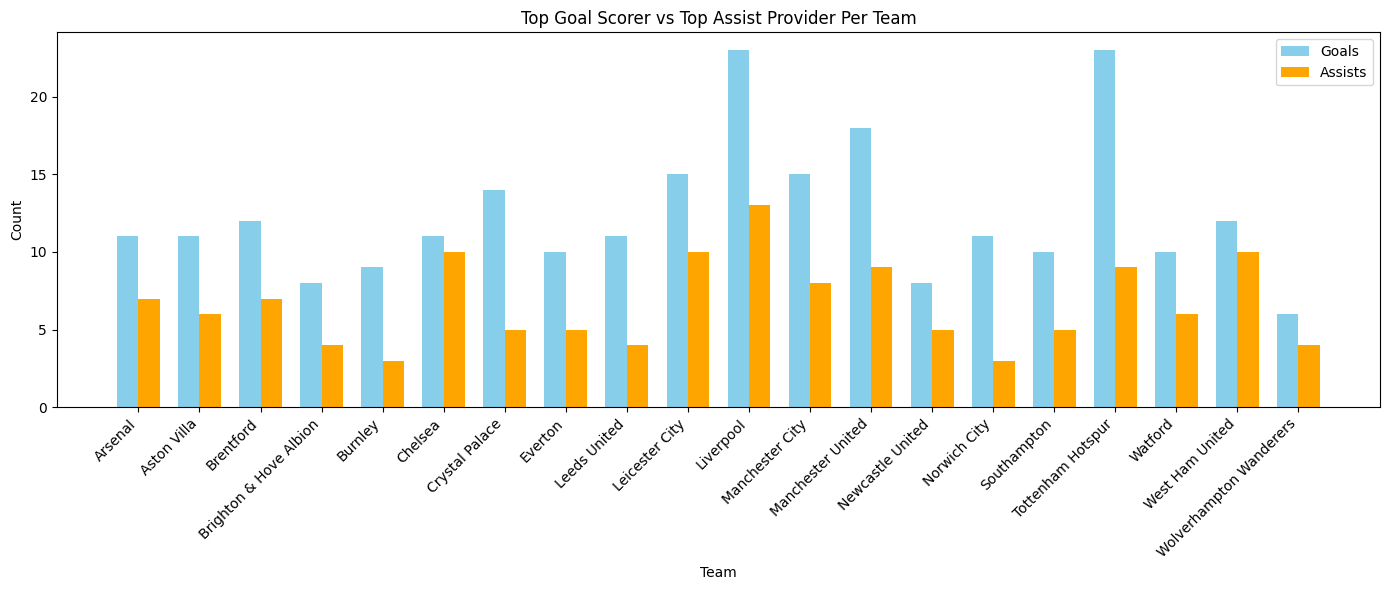

In [ ]:
import numpy as np

teams = team_leaders['Team']
goals = team_leaders['Goals']
assists = team_leaders['Assists']

x = np.arange(len(teams))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, goals, width, label='Goals', color='skyblue')
plt.bar(x + width/2, assists, width, label='Assists', color='orange')
plt.xticks(x, teams, rotation=45, ha='right')
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Top Goal Scorer vs Top Assist Provider Per Team')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Top Goal Scorer
top_scorer = df[['Player', 'Gls']].sort_values(by='Gls', ascending=False).dropna()
top_scorer = top_scorer[top_scorer['Gls'] > 0]  # Optional: ignore players with 0 goals
print(" Top Goal Scorers:")
print(top_scorer.head(1))

# Top Assist Provider
top_assister = df[['Player', 'Ast']].sort_values(by='Ast', ascending=False).dropna()
top_assister = top_assister[top_assister['Ast'] > 0]  # Optional: ignore players with 0 assists
print("\n Top Assist Providers:")
print(top_assister.head(1))


 Top Goal Scorers:
            Player   Gls
356  Mohamed Salah  23.0

 Top Assist Providers:
            Player   Ast
356  Mohamed Salah  13.0


In [ ]:
# Step 1: Create a new column 'G+A' = Goals + Assists
df['G/A'] = df[['Gls', 'Ast']].fillna(0).sum(axis=1)
df_nonzero_ga = df[df['G/A'] > 0]

# Step 3: Sort by 'Team' and 'G+A' in descending order
df_sorted = df_nonzero_ga.sort_values(by=['Team', 'G/A'], ascending=[True, False])

# Step 4: Get top G+A contributor per team
top_ga_per_team = df_sorted.groupby('Team').first().reset_index()

# Step 5: Select only the relevant columns
top_ga_per_team = top_ga_per_team[['Team', 'Player', 'Gls', 'Ast', 'G/A']]

# Display
print(" Top G/A Contributors Per Team:")
print(top_ga_per_team.head(10))


 Top G/A Contributors Per Team:
                     Team                Player   Gls   Ast   G/A
0                 Arsenal           Bukayo Saka  11.0   7.0  18.0
1             Aston Villa         Ollie Watkins  11.0   2.0  13.0
2               Brentford            Ivan Toney  12.0   5.0  17.0
3  Brighton & Hove Albion      Leandro Trossard   8.0   3.0  11.0
4                 Burnley         Maxwel Cornet   9.0   1.0  10.0
5                 Chelsea           Mason Mount  11.0  10.0  21.0
6          Crystal Palace         Wilfried Zaha  14.0   1.0  15.0
7                 Everton           Richarlison  10.0   5.0  15.0
8            Leeds United  Raphael Dias Belloli  11.0   3.0  14.0
9          Leicester City        James Maddison  12.0   8.0  20.0


In [128]:
print("Columns:")
print(df.columns.tolist())

Columns:
['Player', 'Team', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'Gls_per90', 'Ast_per90', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA', 'npxG+xA', 'xG_per90', 'xA_per90', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'G/A', 'Goals_xG_Ratio', 'Performance_Label', 'Disciplinary_Score', 'Playmaker_Index']


In [ ]:
df.rename(columns={
    'Gls.1': 'Gls_per90',
    'Ast.1': 'Ast_per90'
}, inplace=True)


In [52]:
fw_df = df[(df['Min'] > 900) & (df['Pos'].str.strip() == 'FW')]

# Step 3: Remove rows with invalid or zero xG to avoid division errors
fw_df = fw_df[(fw_df['xG'] > 0) & (fw_df['Gls'] >= 1)]


In [53]:
#Calculate the Goals-to-xG Ratio
fw_df['Goals_xG_Ratio'] = fw_df['Gls'] / df['xG']

In [54]:
def categorize_performance(ratio):
    if ratio > 1.1:
        return 'Overperformer'
    elif ratio < 0.9:
        return 'Underperformer'
    else:
        return 'As Expected'

df['Performance_Label'] = df['Goals_xG_Ratio'].apply(categorize_performance)

In [55]:
# Step 4: Show top overperformers
fw_df['Performance_Label'] = fw_df['Goals_xG_Ratio'].apply(categorize_performance)

# Step 6: Sort and display
top_fw_overperformers = fw_df[fw_df['Performance_Label'] == 'Overperformer'] \
    .sort_values(by='Goals_xG_Ratio', ascending=False)

In [56]:
print(" Top Overperforming Forwards:")
print(top_fw_overperformers[['Player', 'Team', 'Pos', 'MP', 'Gls', 'xG', 'Goals_xG_Ratio']].head(10))

 Top Overperforming Forwards:
                Player              Team Pos  MP   Gls   xG  Goals_xG_Ratio
328        Jamie Vardy    Leicester City  FW  25  15.0  9.5        1.578947
220      Wilfried Zaha    Crystal Palace  FW  33  14.0  9.4        1.489362
467      Callum Wilson  Newcastle United  FW  18   8.0  6.5        1.230769
197      Romelu Lukaku           Chelsea  FW  26   8.0  6.8        1.176471
332  Kelechi Iheanacho    Leicester City  FW  26   4.0  3.4        1.176471


/tmp/ipython-input-59-100446276.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




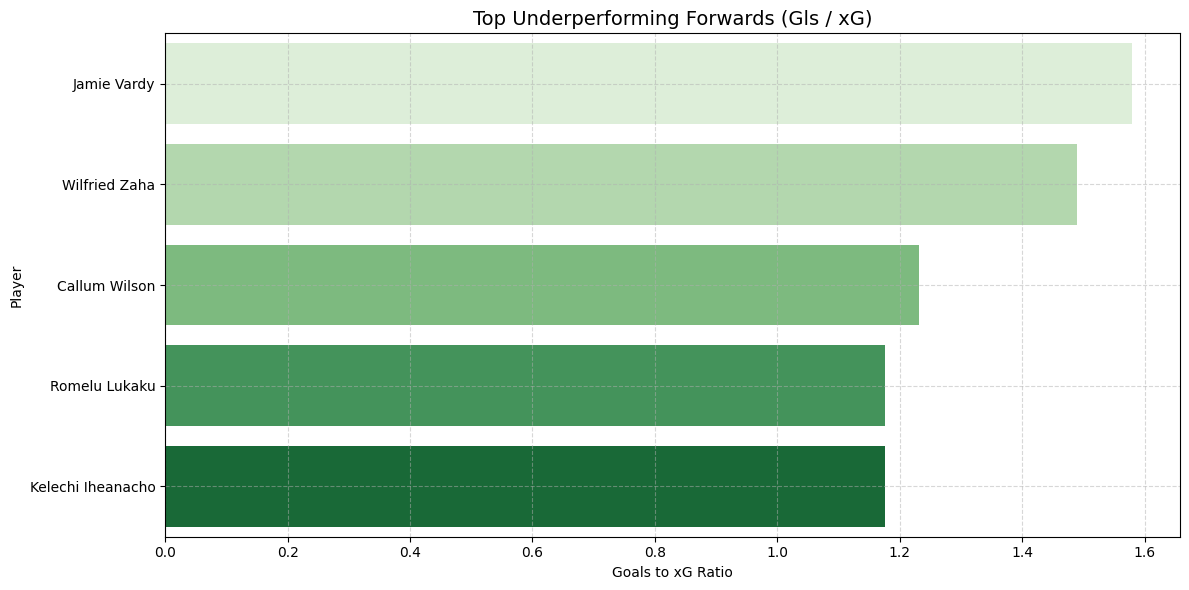

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar chart of top 10 underperforming forwards
plt.figure(figsize=(12,6))
sns.barplot(data=top_fw_overperformers.head(10), x='Goals_xG_Ratio', y='Player', palette='Greens')
plt.title('Top Underperforming Forwards (Gls / xG)', fontsize=14)
plt.xlabel('Goals to xG Ratio')
plt.ylabel('Player')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [57]:
top_fw_underperformers = fw_df[fw_df['Performance_Label'] == 'Underperformer'] \
    .sort_values(by='Goals_xG_Ratio')

# Display top 10
print("🔻 Top Underperforming Forwards (Only FW):")
print(top_fw_underperformers[['Player', 'Team', 'Pos', 'MP', 'Gls', 'xG', 'Goals_xG_Ratio']].head(10))

🔻 Top Underperforming Forwards (Only FW):
                        Player                     Team Pos  MP  Gls   xG  \
84                Bryan Mbeumo                Brentford  FW  35  4.0  9.7   
671               Adama Traoré  Wolverhampton Wanderers  FW  20  1.0  2.4   
168              Jay Rodriguez                  Burnley  FW  29  2.0  4.7   
535             Adam Armstrong              Southampton  FW  23  2.0  4.3   
166              Wout Weghorst                  Burnley  FW  20  2.0  4.2   
395              Jack Grealish          Manchester City  FW  26  3.0  4.8   
590                Joshua King                  Watford  FW  32  5.0  8.0   
435             Anthony Elanga        Manchester United  FW  21  2.0  3.0   
167                 Chris Wood                  Burnley  FW  17  3.0  4.5   
15   Pierre-Emerick Aubameyang                  Arsenal  FW  14  4.0  5.8   

     Goals_xG_Ratio  
84         0.412371  
671        0.416667  
168        0.425532  
535        0.465116  


/tmp/ipython-input-58-2367397840.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




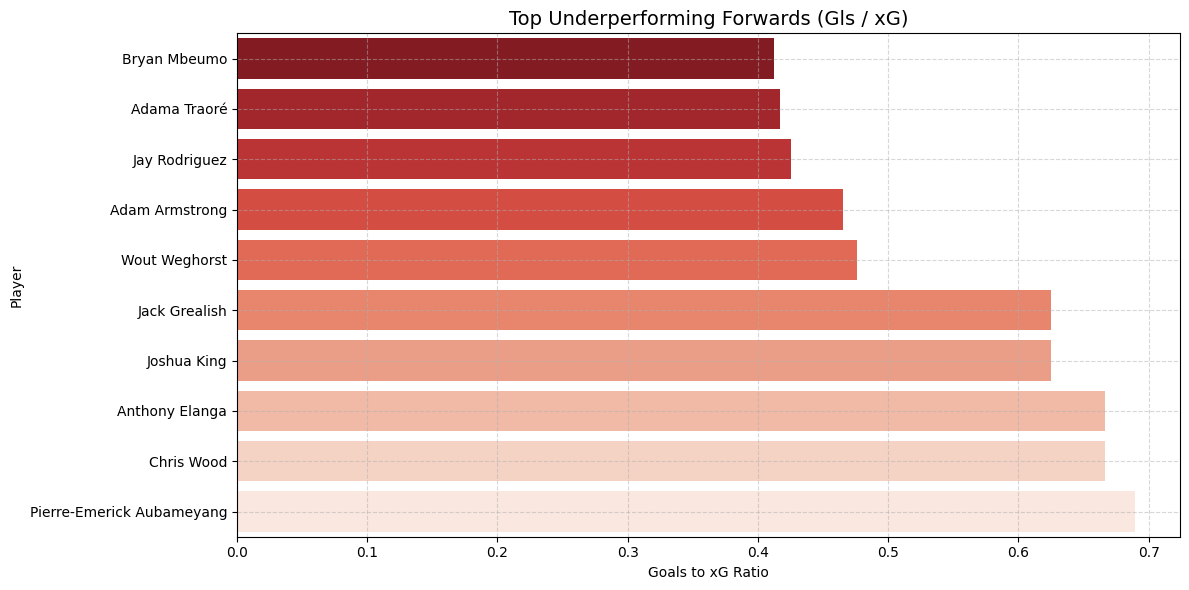

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar chart of top 10 underperforming forwards
plt.figure(figsize=(12,6))
sns.barplot(data=top_fw_underperformers.head(10), x='Goals_xG_Ratio', y='Player', palette='Reds_r')
plt.title('Top Underperforming Forwards (Gls / xG)', fontsize=14)
plt.xlabel('Goals to xG Ratio')
plt.ylabel('Player')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [68]:
combined_fw_df = pd.concat([top_fw_overperformers, top_fw_underperformers])


In [72]:
#Top underperformers vs overperformers accross the league
import plotly.express as px

fig = px.scatter(
    combined_fw_df,
    x='xG',
    y='Gls',
    color='Performance_Label',
    hover_name='Player',  # Player name will appear on hover
    hover_data={
        'Team': True,
        'Pos': True,
        'MP': True,
        'Gls_per90': ':.2f',
        'Ast_per90': ':.2f',
        'Goals_xG_Ratio': ':.2f',
        'xG': ':.2f',
        'Gls': ':.2f',
        'Performance_Label': False  # already used as color
    },
    title='Forward Overperformers vs Underperformers',
    color_discrete_map={'Overperformer': 'green', 'Underperformer': 'red'},
    labels={'xG': 'Expected Goals', 'Gls': 'Goals Scored'}
)

# Reference line: x = y (expected = actual goals)
fig.add_shape(
    type='line',
    x0=0, y0=0,
    x1=combined_fw_df['xG'].max(), y1=combined_fw_df['xG'].max(),
    line=dict(color='gray', dash='dash')
)

fig.update_layout(template='plotly_white')
fig.show()


In [76]:
club_summary = []

# Get list of all unique teams
teams = fw_df['Team'].unique()

for team in teams:
    team_fw_df = fw_df[fw_df['Team'] == team]

    # Top 2 Overperformers
    over = team_fw_df[team_fw_df['Performance_Label'] == 'Overperformer'] \
        .sort_values(by='Goals_xG_Ratio', ascending=False).head(1)

    # Top 2 Underperformers
    under = team_fw_df[team_fw_df['Performance_Label'] == 'Underperformer'] \
        .sort_values(by='Goals_xG_Ratio').head(1)

    # Combine
    combined = pd.concat([over, under])
    club_summary.append(combined)

# Final DataFrame with top over/underperformers for all 20 clubs
club_fw_performance_df = pd.concat(club_summary)

# Optional: Reset index and clean display
club_fw_performance_df.reset_index(drop=True, inplace=True)
display_columns = ['Team', 'Player', 'MP', 'Gls', 'xG', 'Goals_xG_Ratio', 'Performance_Label']
print(club_fw_performance_df[display_columns].to_string(index=False))


                   Team                Player  MP  Gls  xG  Goals_xG_Ratio Performance_Label
                Arsenal      Emile Smith Rowe  33 10.0 5.8        1.724138     Overperformer
                Arsenal   Alexandre Lacazette  30  4.0 7.9        0.506329    Underperformer
            Aston Villa     Philippe Coutinho  19  5.0 3.7        1.351351     Overperformer
            Aston Villa          Ashley Young  24  0.0 0.4        0.000000    Underperformer
              Brentford           Yoane Wissa  30  7.0 3.7        1.891892     Overperformer
              Brentford          Bryan Mbeumo  35  4.0 9.7        0.412371    Underperformer
 Brighton & Hove Albion      Leandro Trossard  34  8.0 6.8        1.176471     Overperformer
 Brighton & Hove Albion           Jakub Moder  28  0.0 2.4        0.000000    Underperformer
                Burnley         Maxwel Cornet  26  9.0 6.7        1.343284     Overperformer
                Burnley         Jay Rodriguez  29  2.0 4.7        0.42

In [77]:
#underperformer and overperformer for all 20 clubs
import plotly.express as px
fig = px.bar(
    club_fw_performance_df,
    x="Team",
    y="Goals_xG_Ratio",
    color="Performance_Label",
    barmode="group",
    hover_data=["Player", "MP", "Gls", "xG"],
    color_discrete_map={
        "Overperformer": "#2ca02c",   # green
        "Underperformer": "#d62728"   # red
    },
    title="Top Overperforming and Underperforming FWs per Club (based on Goals vs xG)"
)

# Improve layout
fig.update_layout(
    xaxis_title="Club",
    yaxis_title="Goals to xG Ratio",
    legend_title="Performance",
    xaxis_tickangle=45,
    height=600
)

fig.show()


In [78]:
# Ensure 'Ast' column is numeric
df['Ast'] = pd.to_numeric(df['Ast'], errors='coerce')

# Group by position and sum assists
position_assists = df.groupby('Pos')['Ast'].sum().sort_values(ascending=False).reset_index()

# Display the result
print(position_assists)


     Pos    Ast
0     DF  169.0
1     FW  150.0
2     MF  149.0
3  FW,MF  124.0
4  MF,FW   75.0
5  MF,DF   11.0
6  DF,FW    6.0
7  FW,DF    4.0
8  DF,MF    1.0


In [79]:
import plotly.express as px

fig = px.bar(
    position_assists,
    x='Pos',
    y='Ast',
    title='Total Assists by Position',
    labels={'Pos': 'Position', 'Ast': 'Total Assists'},
    color='Ast',
    color_continuous_scale='Viridis'
)

fig.update_layout(xaxis_title='Position', yaxis_title='Total Assists')
fig.show()


In [97]:
df['Disciplinary_Score'] = df['CrdY'] * 1 + df['CrdR'] * 3
disciplined_players = df[df['Min'] > 900].sort_values(by='Disciplinary_Score').head(10)

In [98]:
undisciplined_players = df[df['Min'] > 900].sort_values(by='Disciplinary_Score', ascending=False).head(10)

In [100]:
club_discipline = df.groupby('Team')[['CrdY', 'CrdR']].sum()
club_discipline['Disciplinary_Score'] = club_discipline['CrdY'] + club_discipline['CrdR'] * 3
club_discipline = club_discipline.sort_values(by='Disciplinary_Score', ascending=False)
print('club_discipline:')
print(club_discipline.head(10))

club_discipline:
                        CrdY  CrdR  Disciplinary_Score
Team                                                  
Leeds United            86.0   3.0                95.0
Newcastle United        75.0   2.0                81.0
Manchester United       73.0   2.0                79.0
Everton                 63.0   4.0                75.0
Brighton & Hove Albion  67.0   1.0                70.0
Aston Villa             64.0   2.0                70.0
Crystal Palace          63.0   1.0                66.0
Arsenal                 56.0   3.0                65.0
Burnley                 59.0   2.0                65.0
Watford                 55.0   3.0                64.0


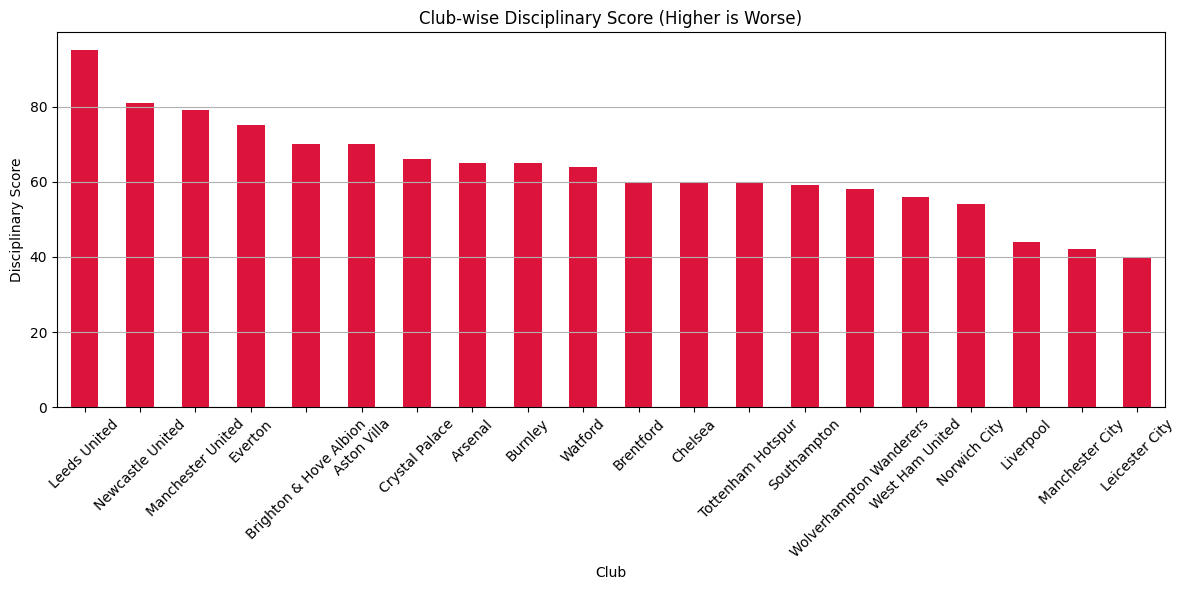

In [101]:
import matplotlib.pyplot as plt

club_discipline['Disciplinary_Score'].plot(kind='bar', figsize=(12, 6), color='crimson')
plt.title("Club-wise Disciplinary Score (Higher is Worse)")
plt.ylabel("Disciplinary Score")
plt.xlabel("Club")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [106]:
position_discipline = df.groupby('Pos')[['CrdY', 'CrdR']].sum()
position_discipline['Disciplinary_Score'] = position_discipline['CrdY'] + position_discipline['CrdR'] * 3
position_discipline['Players_Count'] = df.groupby('Pos').size()
position_discipline['Avg_Disciplinary_Score'] = position_discipline['Disciplinary_Score'] / position_discipline['Players_Count']
position_discipline = position_discipline.sort_values(by='Avg_Disciplinary_Score', ascending=False)
print(position_discipline)


        CrdY  CrdR  Disciplinary_Score  Players_Count  Avg_Disciplinary_Score
Pos                                                                          
DF,MF    5.0   0.0                 5.0              1                5.000000
MF     319.0   5.0               334.0             72                4.638889
DF     487.0  22.0               553.0            128                4.320312
MF,DF   26.0   1.0                29.0              8                3.625000
MF,FW   71.0   1.0                74.0             21                3.523810
FW,DF    7.0   0.0                 7.0              2                3.500000
FW     135.0   4.0               147.0             44                3.340909
FW,MF   98.0   3.0               107.0             37                2.891892
DF,FW    7.0   0.0                 7.0              3                2.333333


In [122]:
card_summary = df.groupby(['Team', 'Pos'])[['CrdY', 'CrdR']].sum().reset_index()
card_summary.columns = ['Team', 'Pos', 'CrdY', 'CrdR']

# Display in clean grouped format
for team, group in card_summary.groupby("Team"):
    print(f"{team}")
    for _, row in group.iterrows():
        print(f"  ├── {row['Pos']:10} : Yellow = {row['CrdY']}, Red = {row['CrdR']}")
    print()

Arsenal
  ├── DF         : Yellow = 18.0, Red = 1.0
  ├── FW         : Yellow = 3.0, Red = 0.0
  ├── FW,MF      : Yellow = 9.0, Red = 1.0
  ├── MF         : Yellow = 15.0, Red = 0.0
  ├── MF,DF      : Yellow = 10.0, Red = 1.0
  ├── MF,FW      : Yellow = 1.0, Red = 0.0

Aston Villa
  ├── DF         : Yellow = 29.0, Red = 2.0
  ├── DF,FW      : Yellow = 2.0, Red = 0.0
  ├── FW         : Yellow = 11.0, Red = 0.0
  ├── FW,MF      : Yellow = 1.0, Red = 0.0
  ├── MF         : Yellow = 21.0, Red = 0.0
  ├── MF,FW      : Yellow = 0.0, Red = 0.0

Brentford
  ├── DF         : Yellow = 24.0, Red = 1.0
  ├── FW         : Yellow = 12.0, Red = 0.0
  ├── FW,MF      : Yellow = 0.0, Red = 0.0
  ├── MF         : Yellow = 18.0, Red = 1.0

Brighton & Hove Albion
  ├── DF         : Yellow = 31.0, Red = 1.0
  ├── DF,FW      : Yellow = 5.0, Red = 0.0
  ├── FW         : Yellow = 7.0, Red = 0.0
  ├── FW,MF      : Yellow = 2.0, Red = 0.0
  ├── MF         : Yellow = 14.0, Red = 0.0
  ├── MF,DF      : Yellow = 1.

In [ ]:
pivot = card_summary.pivot(index='Team', columns='Position', values=['Yellow_Cards', 'Red_Cards'])
pivot.columns = [f"{pos[:2]}_{col}" for col, pos in pivot.columns]
pivot = pivot.reset_index()
print(pivot)


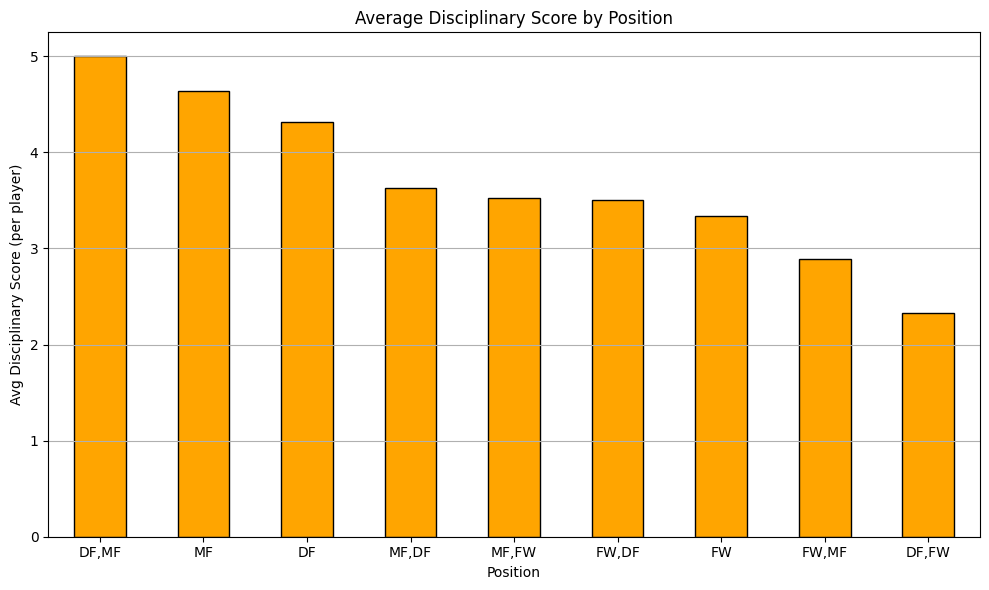

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
position_discipline['Avg_Disciplinary_Score'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Disciplinary Score by Position')
plt.ylabel('Avg Disciplinary Score (per player)')
plt.xlabel('Position')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [116]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Filter players who played more than 15 matches
active_players = df[df['MP'] > 15].copy()

# Step 2: Define the metrics for playmaker score
metrics = ['Gls', 'Ast', 'xG', 'xG_per90', 'xA', 'xA_per90']

# Step 3: Normalize the metrics
scaler = MinMaxScaler()
active_players[metrics] = scaler.fit_transform(active_players[metrics])

# Step 4: Calculate playmaker score
active_players['playmaker_score'] = active_players[metrics].sum(axis=1)

# Step 5: Find top playmaker per club
top_playmakers_by_club = active_players.sort_values(by='playmaker_score', ascending=False) \
                                       .groupby('Team') \
                                       .head(1) \
                                       .sort_values(by='playmaker_score', ascending=False)

# Step 6: Select and display key columns
result = top_playmakers_by_club[['Player', 'Team', 'MP', 'Gls', 'Ast', 'xG', 'xG_per90', 'xA', 'xA_per90', 'playmaker_score']]
print(result)


                   Player                     Team  MP       Gls       Ast  \
356         Mohamed Salah                Liverpool  35  1.000000  1.000000   
553            Harry Kane        Tottenham Hotspur  37  0.739130  0.692308   
392       Kevin De Bruyne          Manchester City  30  0.652174  0.615385   
188           Mason Mount                  Chelsea  32  0.478261  0.769231   
629          Jarrod Bowen          West Ham United  36  0.521739  0.769231   
423     Cristiano Ronaldo        Manchester United  30  0.782609  0.230769   
0             Bukayo Saka                  Arsenal  38  0.478261  0.538462   
86             Ivan Toney                Brentford  33  0.521739  0.384615   
288  Raphael Dias Belloli             Leeds United  35  0.478261  0.230769   
322        James Maddison           Leicester City  35  0.521739  0.615385   
220         Wilfried Zaha           Crystal Palace  33  0.608696  0.076923   
522     James Ward-Prowse              Southampton  36  0.434783